# Correlation and Autocorrelation in Time Series - Lab

## Introduction

In this lab, You'll practice your knowledge on correlation, autocorrelation and the ACF and PACF.

## Objectives

You will be able to:
- Understand correlation in Time Series
- Plot and discuss the autocorrelation function (ACF) for a time-series 
- Plot and discuss the partial autocorrelation function (PACF) for a time-series 
- Interpret ACF and PACF and Identify use cases both functions

## The Exchange Rate Data

We'll be looking at the exchange rates dataset again. First, import the necessary libraries for time series and plotting. Then import the data (in `exch_rates.csv`) and make sure it's set in the correct time series format with the `datetime` as the index.

In [1]:
# your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# your code here
df = pd.read_csv('exch_rates.csv')
df.Frequency = pd.to_datetime(df.Frequency)
df.set_index('Frequency',inplace=True)
df.head()

,Euro,Australian Dollar,Danish Krone
Frequency,,,
2000-01-01,NaN,NaN,NaN
2000-01-02,NaN,NaN,NaN
2000-01-03,0.991080,1.520912,7.374034
2000-01-04,0.970403,1.521300,7.222610
2000-01-05,0.964506,1.521316,7.180170


Plot the three exchange rates in one plot

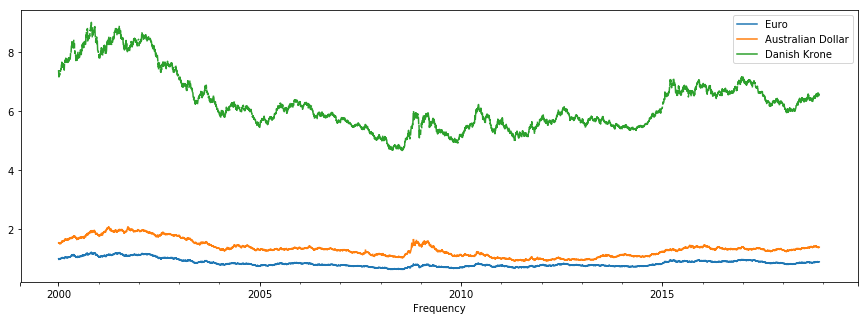

In [3]:
# your code here
df.plot(figsize=(15,5))

You can see that the EUR/USD and AUD/USD exchange rate are somewhere between rougly 0.5 and 2 between 2000 and 2018, where the Danish Krone is somewhere between roughly 4.5 and 9. Now let's look at the correlations between these time series.

In [4]:
# your code here
df.corr()

,Euro,Australian Dollar,Danish Krone
Euro,1.000000,0.883181,0.999952
Australian Dollar,0.883181,1.000000,0.882513
Danish Krone,0.999952,0.882513,1.000000


### What is your conclusion here? You might want to use outside resources to understand what's going on.

The Danish Krone is pegged to the Euro -- therefore highly correlated.

Next, look at the plots of the differenced series. Use subplots to plot them rather than creating just one plot.

In [5]:
# your code here
df_diff = df.diff(periods=1)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x117d98160>,
      dtype=object)

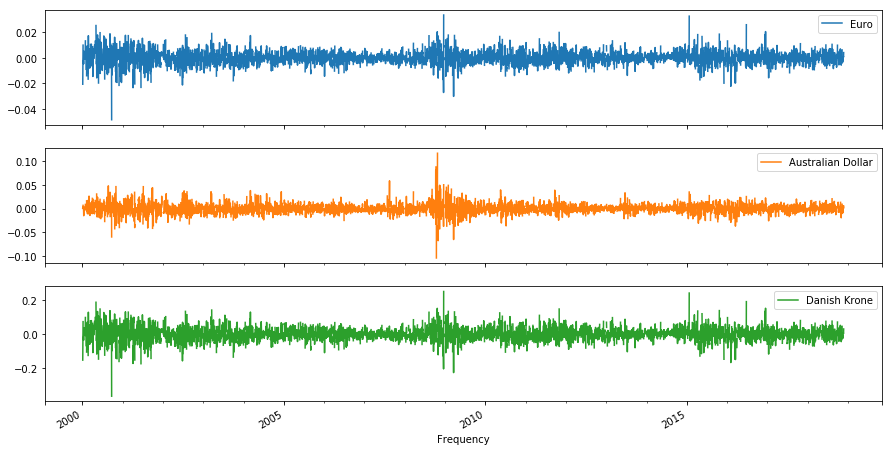

In [6]:
# your code here
df_diff.plot(figsize=(15,8),subplots=True)

In [7]:
# your code here
df_diff.corr()

,Euro,Australian Dollar,Danish Krone
Euro,1.000000,0.545369,0.999667
Australian Dollar,0.545369,1.000000,0.545133
Danish Krone,0.999667,0.545133,1.000000


### Explain what's going on

Seasonality has been removed which in-turn lowered correlations with the Australian Dollar.

Next, let's look at the "lag 1 autocorrelation" for the EUR/USD exchange rate. Create a "lag 1 autocorrelation" series, plot the result, and look at the correlation coefficient.

In [8]:
# your code here
df_euro = df.Euro

,Euro,Euro
Euro,1.000000,0.999146
Euro,0.999146,1.000000


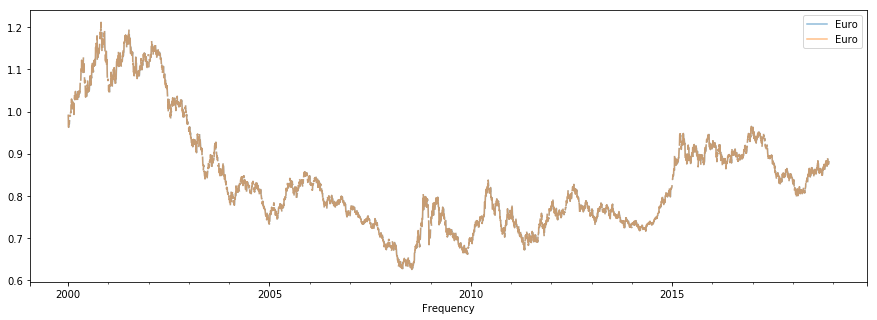

In [9]:
# your code here
df_euro_shift = df_euro.shift(periods=1)

lag_1_autocorr = pd.concat([df_euro_shift, df_euro], axis=1)
lag_1_autocorr.plot(figsize=(15,5), alpha=0.5);
lag_1_autocorr.corr()

Repeat this, but for a "lag 5 autocorrelation"

,Euro,Euro
Euro,1.000000,0.968321
Euro,0.968321,1.000000


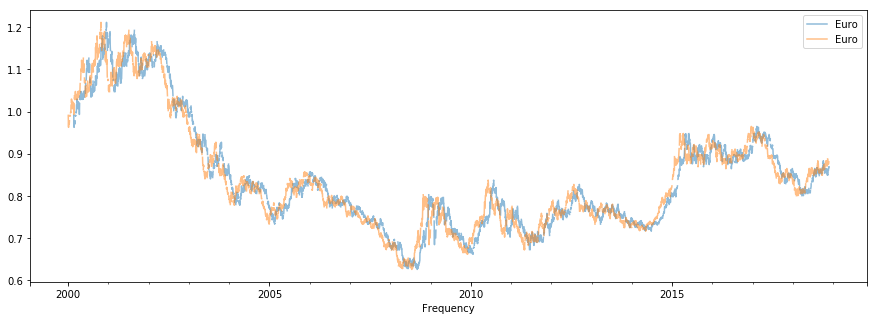

In [10]:
# your code here
df_euro_shift = df_euro.shift(periods=50)

lag_5_autocorr = pd.concat([df_euro_shift, df_euro], axis=1)
lag_5_autocorr.plot(figsize=(15,5), alpha=0.5);
lag_5_autocorr.corr()

In [11]:
# your code here

### What's your conclusion here?

Knowing this, let's plot the ACF now.

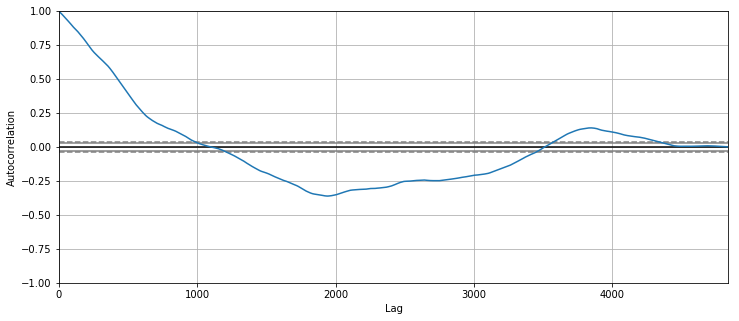

In [12]:
# your code here
plt.figure(figsize=(12,5))
pd.plotting.autocorrelation_plot(df_euro.dropna());

The series is heavily autocorrelated at first, and then there is a decay. This is a typical result for a series that is a random walk, generally you'll see heavy autocorrelations first, slowly tailing off until there is no autocorrelation anymore.

Next, let's look at the Partial Autocorrelation Function.

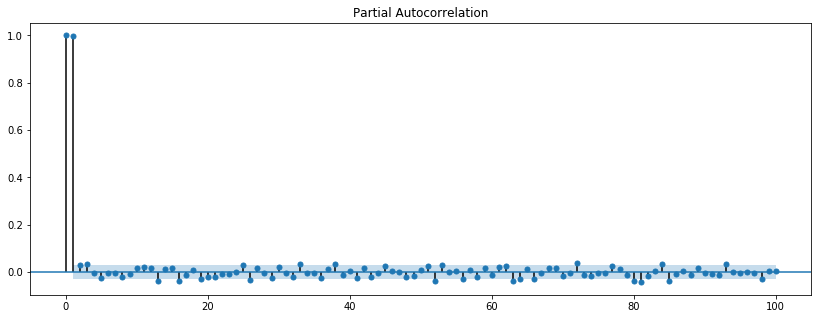

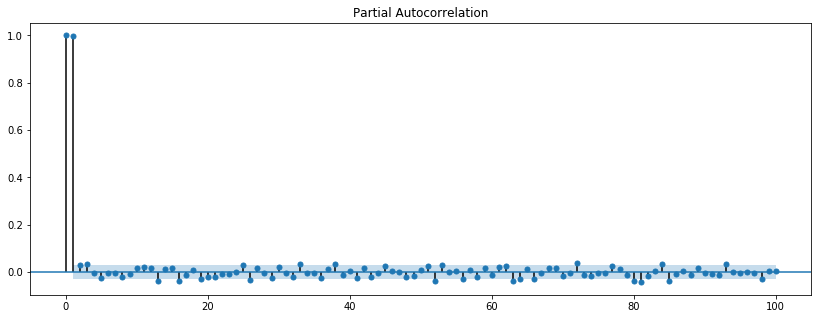

In [13]:
# your code here
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 14, 5
plot_pacf(df_euro.dropna(), lags=100)

This is interesting! Remember that *Partial Autocorrelation Function* gives the partial correlation of a time series with its own lagged values, controlling for the values of the time series at all shorter lags. When controlling for 1 period lags, the PACF is only very high for one-period lags, and basically 0 for shorter lags. This is again a typical result for Random Walk series!

## The Airpassenger Data

Look at ACF and PACF for the airpassenger data and describe the result `passengers.csv`. Do this both for the differenced and regular series.

In [14]:
# your code here
air = pd.read_csv('passengers.csv')
air.Month = pd.to_datetime(air.Month)
air.set_index('Month', inplace = True)

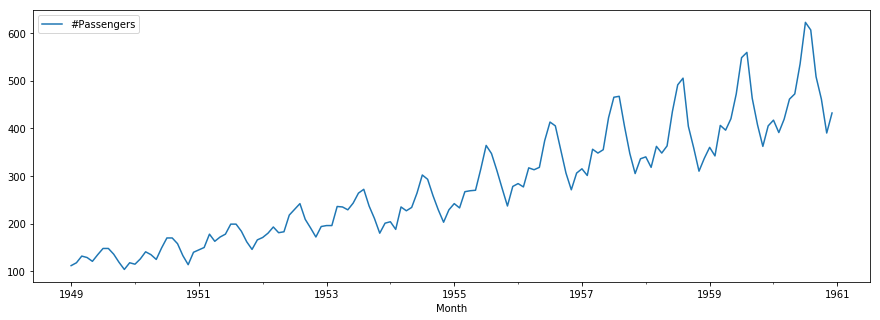

In [15]:
# your code here
air.plot(figsize=(15,5))

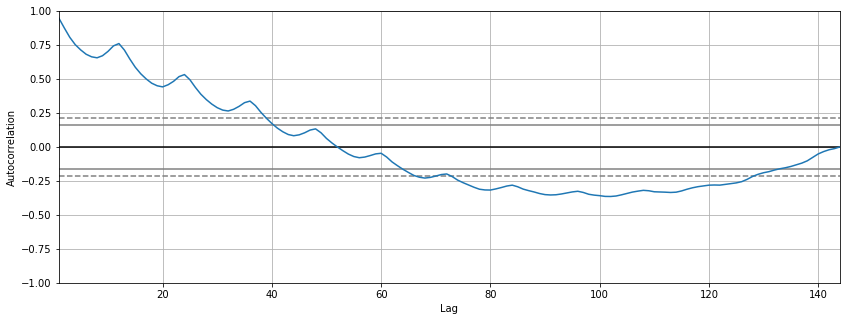

In [16]:
pd.plotting.autocorrelation_plot(air)

/Users/dennistrimarchi/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


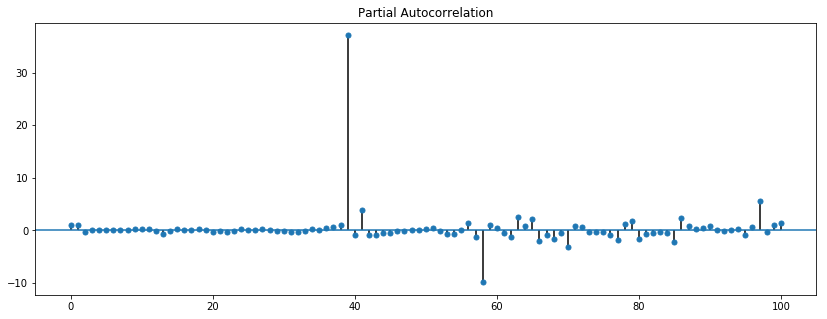

In [17]:
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 14, 5
plot_pacf(air.dropna(), lags = 100);

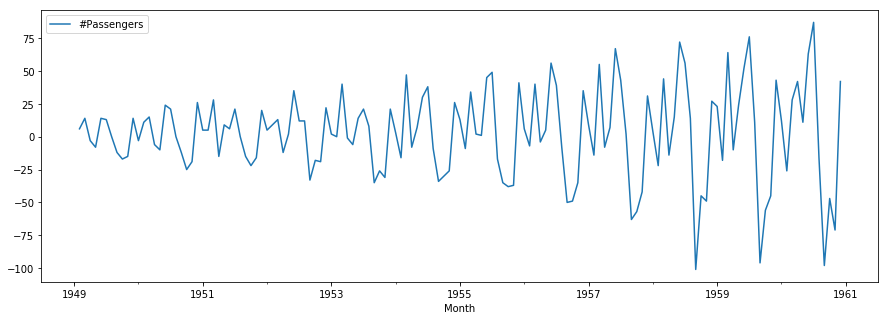

In [18]:
# your code here
air_diff = air.diff(periods=1)
air_diff.plot(figsize=(15,5))

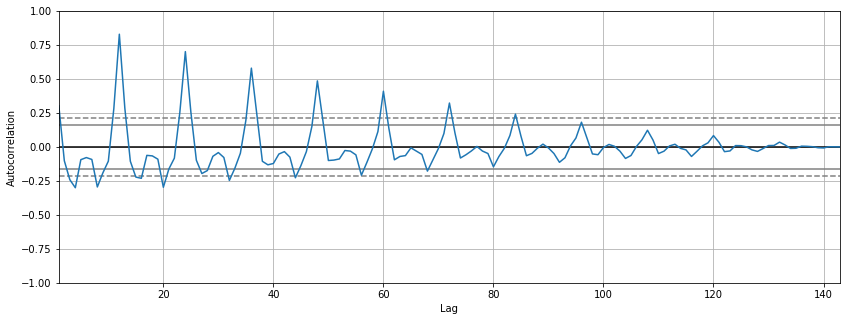

In [19]:
# your code here
pd.plotting.autocorrelation_plot(air_diff.dropna())

/Users/dennistrimarchi/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


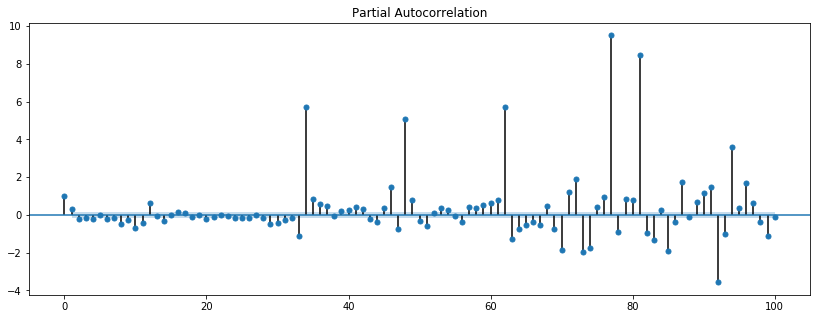

In [20]:
# your code here
rcParams['figure.figsize'] = 14, 5
plot_pacf(air_diff.dropna(), lags = 100);

In [21]:
# your code here

In [22]:
# your code here

### Your conclusion here

## The NYSE data

Look at correlation and autocorrelation functions for the NYSE data ("NYSE_monthly.csv")

In [23]:
# your code here
data = pd.read_csv("NYSE_monthly.csv")
col_name= 'Month'
data[col_name] = pd.to_datetime(data[col_name])
data.set_index(col_name, inplace=True)
data.head()

,monthly_return
Month,
1961-01-01,0.082
1961-02-01,0.059
1961-03-01,0.050
1961-04-01,0.008
1961-05-01,0.042


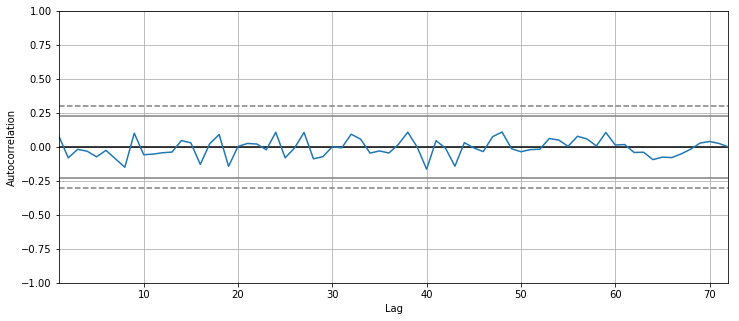

In [24]:
# your code here
plt.figure(figsize=(12,5))
pd.plotting.autocorrelation_plot(data.dropna());

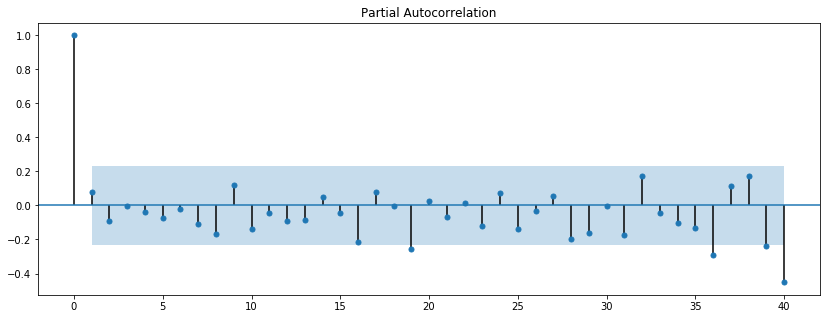

In [27]:
# your code here

from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 14, 5

plot_pacf(data, lags = 40);

## Your conclusion here



## Summary

Great, you've now been introduced to correlation, the ACF and PACF. Let's move into more serious modeling with autoregressive and moving average models!